In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

**Gathering Data** 

In [2]:
data=pd.read_csv('../input/stack-overflow-developer-survey-results-2019/survey_results_public.csv')

In [3]:
df=pd.read_csv('../input/stack-overflow-developer-survey-results-2019/survey_results_schema.csv')

**Assessing The data**

In [4]:
data.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [5]:
df.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...


we will be working with the first data only, as the second one is the explaination of the columns of first data.

In [6]:
data.shape

(88883, 85)

In [7]:
data.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61

**Cleaning The Data**

In [9]:
data.drop(['CurrencySymbol','CurrencyDesc','CompTotal','CompFreq','ConvertedComp','WorkWeekHrs','WorkPlan','WorkChallenge','WorkRemote','WorkLoc','ImpSyn','CodeRev','CodeRevHrs','UnitTests','PurchaseHow','PurchaseWhat','OrgSize','YearsCodePro','CareerSat','JobSat','MgrIdiot','MgrMoney','MgrWant','LastInt','FizzBuzz'],axis=1,inplace=True)

In [10]:
data.shape

(88883, 60)

**The EDA**

In [11]:
data['Employment'].value_counts()

Employed full-time                                      64440
Independent contractor, freelancer, or self-employed     8511
Not employed, but looking for work                       5600
Employed part-time                                       4469
Not employed, and not looking for work                   3803
Retired                                                   358
Name: Employment, dtype: int64

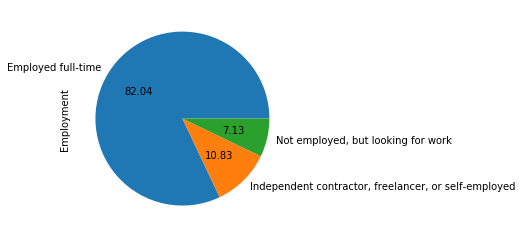

In [12]:
data['Employment'].value_counts().head(3).plot(kind='pie',autopct='%0.2f')

In [13]:
data['MainBranch'].value_counts()

I am a developer by profession                                                   65679
I am a student who is learning to code                                           10189
I am not primarily a developer, but I write code sometimes as part of my work     7539
I code primarily as a hobby                                                       3340
I used to be a developer by profession, but no longer am                          1584
Name: MainBranch, dtype: int64

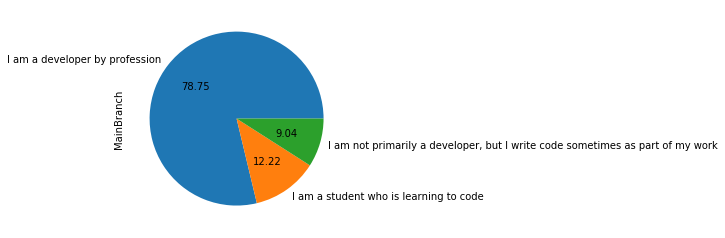

In [14]:
data['MainBranch'].value_counts().head(3).plot(kind='pie',autopct='%0.2f')

In [15]:
a=data['MainBranch'].value_counts()

In [16]:
b=data['MainBranch'].value_counts()>3500

In [17]:
c=a[b].index.tolist()
c

['I am a developer by profession',
 'I am a student who is learning to code',
 'I am not primarily a developer, but I write code sometimes as part of my work']

In [18]:
data=data[data['MainBranch'].isin(c)]

In [19]:
data.shape

(83407, 60)

In [20]:
data['Hobbyist'].value_counts()

Yes    66376
No     17031
Name: Hobbyist, dtype: int64

In [21]:
data['Hobbyist'].replace({'Yes':1,'No':0},inplace=True)

In [22]:
data['Country'].value_counts().head(10)
#top 10 Country with most number of upcoming developers

United States     19725
India              8708
Germany            5491
United Kingdom     5375
Canada             3186
France             2246
Brazil             1855
Poland             1828
Australia          1767
Netherlands        1729
Name: Country, dtype: int64

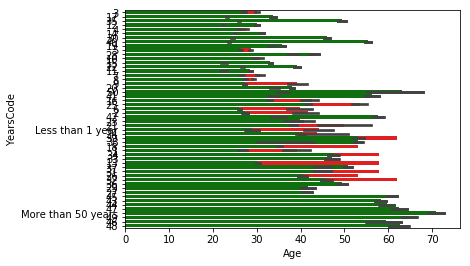

In [23]:
data_india=data[data['Country']=='India']
sns.barplot(y='YearsCode',x='Age',data=data_india,color='red')
data_US=data[data['Country']=='United States']
sns.barplot(y='YearsCode',x='Age',data=data_US,color='blue')
data_germany=data[data['Country']=='Germany']
sns.barplot(y='YearsCode',x='Age',data=data_US,color='green')

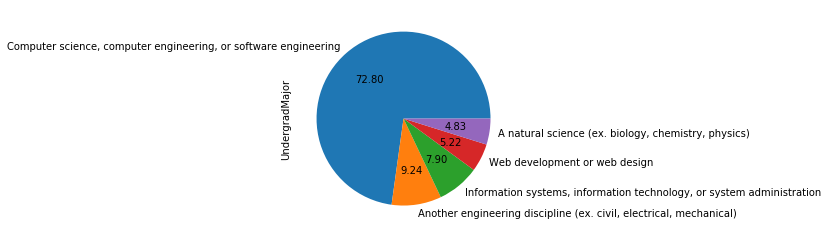

In [24]:
data['UndergradMajor'].value_counts().head(5).plot(kind='pie',autopct='%0.2f')
#top 5 streams people are studying as their main field

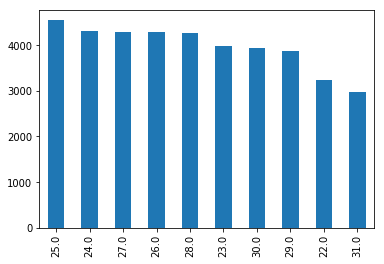

In [25]:
data['Age'].value_counts().head(10).plot(kind='bar')
#top 10 age groups who codes

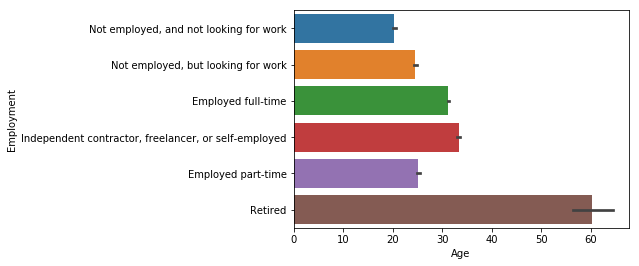

In [26]:
sns.barplot(x='Age',y= 'Employment',data=data)

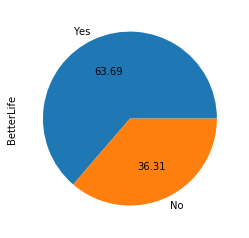

In [27]:
data['BetterLife'].value_counts().plot(kind='pie',autopct='%0.2f')

In [28]:
data['Gender'].value_counts()

Man                                                            73415
Woman                                                           5970
Non-binary, genderqueer, or gender non-conforming                541
Man;Non-binary, genderqueer, or gender non-conforming            165
Woman;Non-binary, genderqueer, or gender non-conforming          150
Woman;Man                                                        105
Woman;Man;Non-binary, genderqueer, or gender non-conforming       56
Name: Gender, dtype: int64

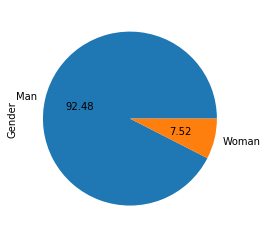

In [29]:
data['Gender'].value_counts().head(2).plot(kind='pie',autopct='%0.2f')
#the two genders who codes most

In [30]:
data['OpenSourcer'].value_counts()

Never                                                 30070
Less than once per year                               23654
Less than once a month but more than once per year    19485
Once a month or more often                            10198
Name: OpenSourcer, dtype: int64

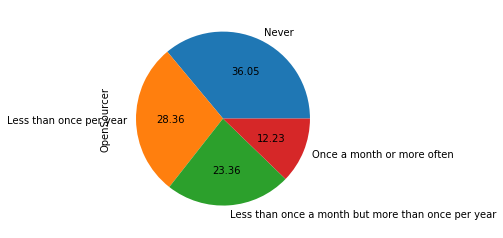

In [31]:
data['OpenSourcer'].value_counts().plot(kind='pie',autopct='%0.2f')
#checking for percentage

In [32]:
data_india=data[data['Country']=='India']
data_us=data[data['Country']=='United States']
data_germany=data[data['Country']=='Germany']

In [33]:
#using the top 3 countries for comparison

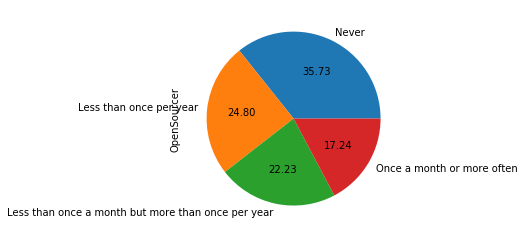

In [34]:
data_india['OpenSourcer'].value_counts().plot(kind='pie',autopct='%0.2f')

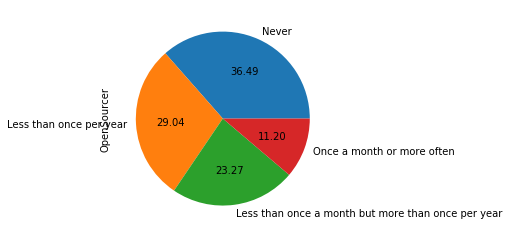

In [35]:
data_us['OpenSourcer'].value_counts().plot(kind='pie',autopct='%0.2f')

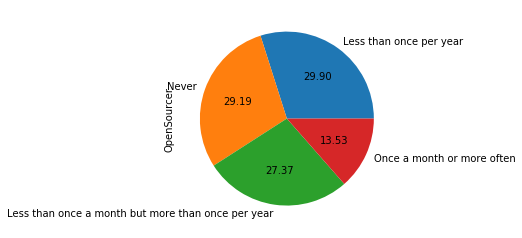

In [36]:
data_germany['OpenSourcer'].value_counts().plot(kind='pie',autopct='%0.2f')

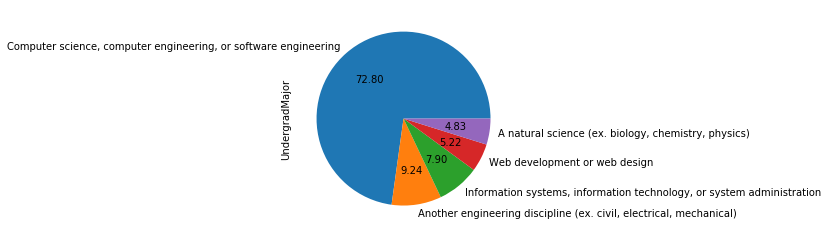

In [37]:
data['UndergradMajor'].value_counts().head(5).plot(kind='pie',autopct='%0.2f')
#top 5 subjects which people opt as their main field

In [38]:
data_india['EdLevel'].value_counts().head(5)

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              5407
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           1805
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     643
Some college/university study without earning a degree                                 271
Primary/elementary school                                                               72
Name: EdLevel, dtype: int64

In [39]:
data_us['EdLevel'].value_counts().head(5)

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              10651
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                            3419
Some college/university study without earning a degree                                 2616
Associate degree                                                                        922
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)      899
Name: EdLevel, dtype: int64

In [40]:
data_germany['EdLevel'].value_counts().head(5)

Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           1682
Bachelor’s degree (BA, BS, B.Eng., etc.)                                              1509
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    1042
Some college/university study without earning a degree                                 585
Other doctoral degree (Ph.D, Ed.D., etc.)                                              224
Name: EdLevel, dtype: int64

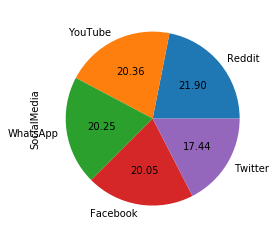

In [41]:
data['SocialMedia'].value_counts().head(5).plot(kind='pie',autopct='%0.2f')